# Временные ряды 1. Введение в задачу анализа временных рядов

__1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:__

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

__Ответы__

+а): в связи с инфляцией, спросом/предложением, курсом валют, сезоном выплаты бонусов и прочими сезонами

+б): в течение полета могут возникнуть различные факторы, влияющие на скорость и на временной шкале можно увидеть изменения в скорости, что всегда используется при расследовании авиапроисшествий, например

-в): если мы не говорим о тестировании новой архитектуры или устойчивости к экстримальным факторам, то это не временной ряд

+г): сезонность, дни недели, даже время суток; изменение весов различных возрастных групп в населении района; изменение количества жителей района

+д): зависимость во времени от собледения графика и скорости движения

-е): если нарушитель действовал не по плану, то это не временной ряд

__2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.__

__Ответ__

В начале опишем итоги. Вычисления идут ниже:<br> 
1) Представлены данные по передаче мощности за 2005-2018 годы<br>
2) Данные имеют циклический характер, потребление носит сезонный характер<br>
3) Выбросов не обнаружено, максимумы и минимумы потребления не выбиваются из общей картины<br>
4) Были пропущенные данные по четырем дням, а также задвоенные в таком же количестве, что связано с переходом на зимнее-летнее время<br>
5) Пропуски и дублирование исправлены

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('E:\GB\Time series\DUQ_hourly.csv', index_col = [0], parse_dates = True)
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Числовой временной ряд<br>
Интервал изменения индексов: 2005-12-31 01:00:00 - 2018-01-02 00:00:00<br>
Общий объем данных: 119 068 значений<br>
Тип измеряемой информации при записи: float64

In [4]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [5]:
data['DUQ_MW'].isnull().sum()

0

Пропусков нет. Это хорошо.

Text(0, 0.5, 'МВт')

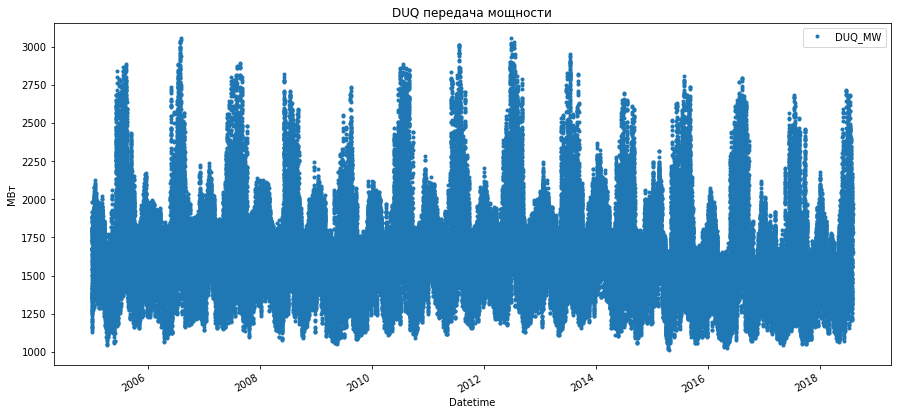

In [6]:
data.plot(style = '.', figsize = ( 15, 7 ), title = 'DUQ передача мощности')
plt.ylabel ( 'МВт' )

Передача мощности цикличная, без видимых выбросов, хотя кое-где есть небольшие 'сопли'. Например, похоже в начале 2010.<br> Посмотрим максимумы и минимумы.

In [7]:
data.nlargest(10, 'DUQ_MW')

,DUQ_MW
Datetime,
2012-06-29 14:00:00,3054.0
2006-08-03 16:00:00,3053.0
2006-08-03 17:00:00,3046.0
2006-08-02 17:00:00,3035.0
2012-07-17 18:00:00,3029.0
2006-08-03 15:00:00,3027.0
2006-08-02 15:00:00,3027.0
2012-06-29 15:00:00,3024.0
2006-08-02 16:00:00,3023.0


Максимальные значения приходятся на летний период 2006 и 2012гг. Нужно посмотреть на температурные данные за весь период датафрейма, т.е. за 2005-2018гг. Скорее всего, летом 2006 и 2012 мы увидим аномальную жару, в результате которой кондиционеры работали на полную мощность нон-стоп, что и вызвало максимальное потребление мощности за весь рассматриваемый период. 

In [8]:
data.nsmallest(10, 'DUQ_MW')

,DUQ_MW
Datetime,
2015-04-27 06:00:00,1014.0
2015-04-19 06:00:00,1020.0
2015-04-19 04:00:00,1024.0
2015-04-19 05:00:00,1025.0
2016-05-08 05:00:00,1028.0
2016-04-17 05:00:00,1036.0
2015-04-19 03:00:00,1039.0
2016-04-17 04:00:00,1039.0
2016-05-08 04:00:00,1043.0


Здесь мы видим минимальные значения в мае-апреле 2015 и 2016гг. По аналогии с анализом максимальных значений иожно предположить, что была теплая погода, поэтому потребление э/э для отопления было минимальным. 

Все-таки посмотрим что происходило в начале 2010.

In [9]:
data['date'] = data.index

In [10]:
data_2010 = data.loc[np.logical_and(np.logical_and(data['date'].dt.year == 2010 , data['date'].dt.month == 2),
                                    data['date'].dt.day < 7)]

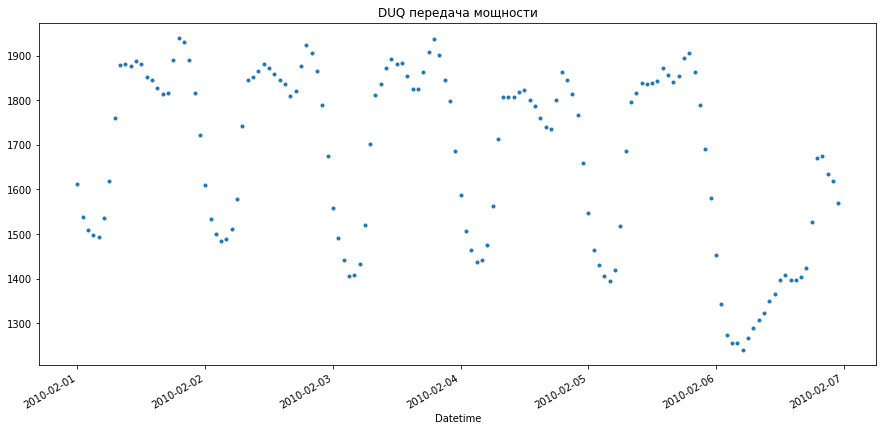

In [11]:
_ = data_2010['DUQ_MW'].plot(style='.', figsize=(15, 7), title='DUQ передача мощности')

На 6-е ноября 2010 наблюдается небольшая просадка. Вряд ли это связано с аварией. Скорее всего краткосрочное уменьшение передачи мощности связано с одним и несколькими потребителями в регионе.

Сопоставим число наблюдений и число уникальных значений, как на уроке.

In [12]:
data['date'] = data.index
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])
count_data = data['date'].value_counts()
count_data.head()

число уникальных значений:    119064  : число наблюдений :  119068


2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

Видим задвоенные даты. В связи с переводом времени, видимо. Тогда при переходе на летнее время (март-апрель) должен быть пропуск. Проверим по первой строке (ноябрь 2017).

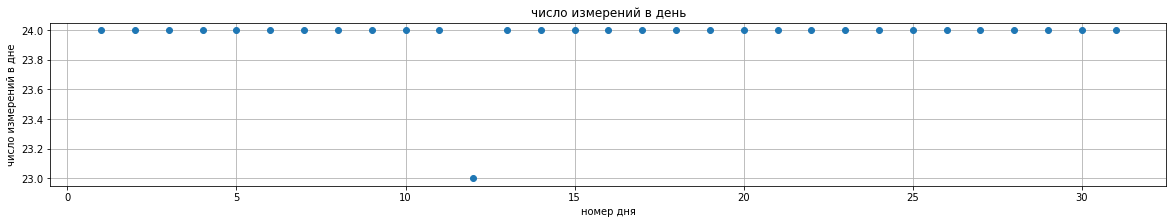

In [13]:
day_H=data['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.grid()
plt.show()

Видим пропуск. Посмотрим что за день/дата.

In [14]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

12    23
Name: Datetime, dtype: int64

Это 12.03.2017. Посмотрим поближе на этот день в почасовом разрезе.

In [15]:
data['2017-03-12 01:00:00':'2017-03-12 06:00:00'].index

DatetimeIndex(['2017-03-12 01:00:00', '2017-03-12 02:00:00',
               '2017-03-12 04:00:00', '2017-03-12 05:00:00',
               '2017-03-12 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

Видим, что выпало 2 часа между 2:00 и 4:00. Посмотрим, что происходило с 11-го на 12-е и весь день 12 марта 2017.

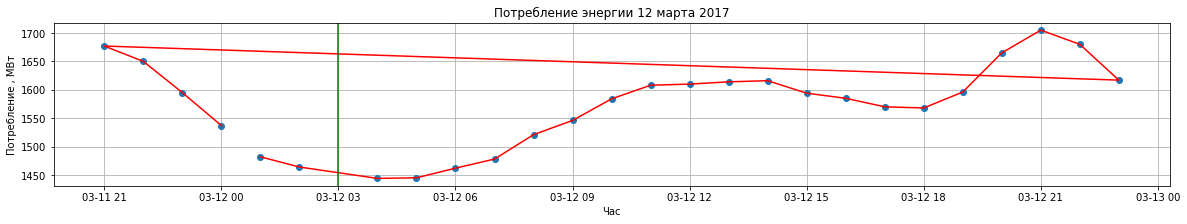

In [16]:
plt.figure(figsize=(20,3))
plt.plot(data['2017-03-11 21:00:00':'2017-03-12 23:00:00'].index,
         data['2017-03-11 21:00:00':'2017-03-12 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2017-03-11 21:00:00':'2017-03-12 23:00:00'].index,
         data['2017-03-11 21:00:00':'2017-03-12 23:00:00']['DUQ_MW'].values, 'r')

plt.axvline(pd.to_datetime('2017-03-12 03:00:00'), color = 'green')
plt.xlabel('Час')
plt.ylabel('Потребление , МВт')
plt.title('Потребление энергии 12 марта 2017')
plt.grid()

plt.show()

ЧТД. Теперь посмотрим другие аномалии по всему ряду.

In [17]:
day_H=data['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2014 = Day_count[Day_count != 24].index
d2014

Int64Index([9], dtype='int64')

In [18]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2015 = Day_count[Day_count != 24].index
d2015

Int64Index([8], dtype='int64')

In [19]:
day_H=data['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2016 =Day_count[Day_count != 24].index
d2016

Int64Index([13], dtype='int64')

In [20]:
day_H=data['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2017 =Day_count[Day_count != 24].index
d2017

Int64Index([12], dtype='int64')

Решаем проблему пропуска через интерполяцию между соседними метками.

In [21]:
v1 = list((data['2014-03-09 02:00:00']['DUQ_MW'].values + data['2014-03-09 04:00:00']['DUQ_MW'].values) / 2)
v2 = list((data['2015-03-08 02:00:00']['DUQ_MW'].values + data['2015-03-08 04:00:00']['DUQ_MW'].values) / 2)
v3 = list((data['2016-03-13 02:00:00']['DUQ_MW'].values + data['2016-03-13 04:00:00']['DUQ_MW'].values) / 2)
v4 = list((data['2017-03-12 02:00:00']['DUQ_MW'].values + data['2017-03-12 04:00:00']['DUQ_MW'].values) / 2)

v =np.reshape([v1[0],v2[0],v3[0],v4[0]],(4,1))

df_data = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00',
                                                         '2015-03-08 03:00:00',
                                                         '2016-03-13 03:00:00',
                                                         '2017-03-12 03:00:00'])), columns =['DUQ_MW'] , data = v) 
df_data['date'] = df_data.index
df_data.head()

data = data.append(df_data,sort = False)
data.tail()

,DUQ_MW,date
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


Решаем вопрос с дублированием.

In [22]:
count_data.iloc[:4]

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
Name: date, dtype: int64

In [23]:
data.drop_duplicates(subset = 'date', keep=False, inplace = True)

data.index.value_counts().head()

2010-07-31 10:00:00    1
2016-01-10 01:00:00    1
2016-02-14 21:00:00    1
2007-07-15 10:00:00    1
2012-02-07 10:00:00    1
dtype: int64

In [24]:
data['date'] = data.index
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119064


__3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.__

Text(0.5, 0, 'weeks')

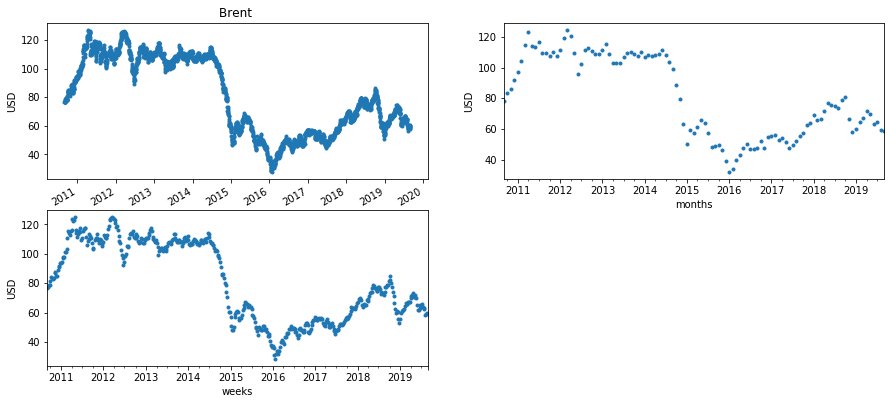

In [25]:
brent_data = pd.read_excel('E:\GB\Time series\нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates= True)
brent_datam = brent_data.resample("M").mean() 
brent_dataw = brent_data.resample("W").mean() 

plt.figure(figsize=(25,6))
plt.subplot(2,2,1)
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USD')
plt.xlabel('days')

plt.subplot(2,2,2)
_ = brent_datam['Значение'].plot( style='.', figsize=( 15, 7 ))
plt.ylabel('USD')
plt.xlabel('months')

plt.subplot(2,2,3)
_ = brent_dataw['Значение'].plot( style='.', figsize=( 15, 7 ))
plt.ylabel('USD')
plt.xlabel('weeks')

__4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.__

Text(0.5, 1.0, 'График изменения среднего по выборке')

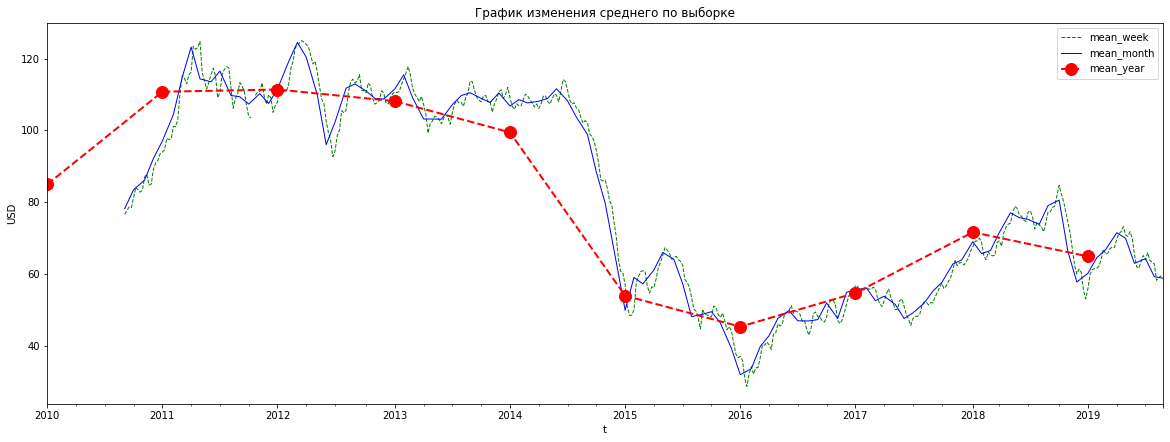

In [26]:
brent_data_year = brent_data.resample('Y').mean()
brent_data_month = brent_data.resample('M').mean()
brent_data_week = brent_data.resample('W').mean()
plt.figure(figsize=(20,7))
brent_data_week['Значение'].plot(color='g', linewidth=1, linestyle='dashed', label='mean_week')
brent_data_month['Значение'].plot(color='b', linewidth=1, label='mean_month')
brent_data_year['Значение'].plot(color='r', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='mean_year')
plt.legend()
plt.ylabel('USD')
plt.xlabel('t')
plt.title('График изменения среднего по выборке')

Text(0.5, 1.0, 'График среднеквадратичного отклонения')

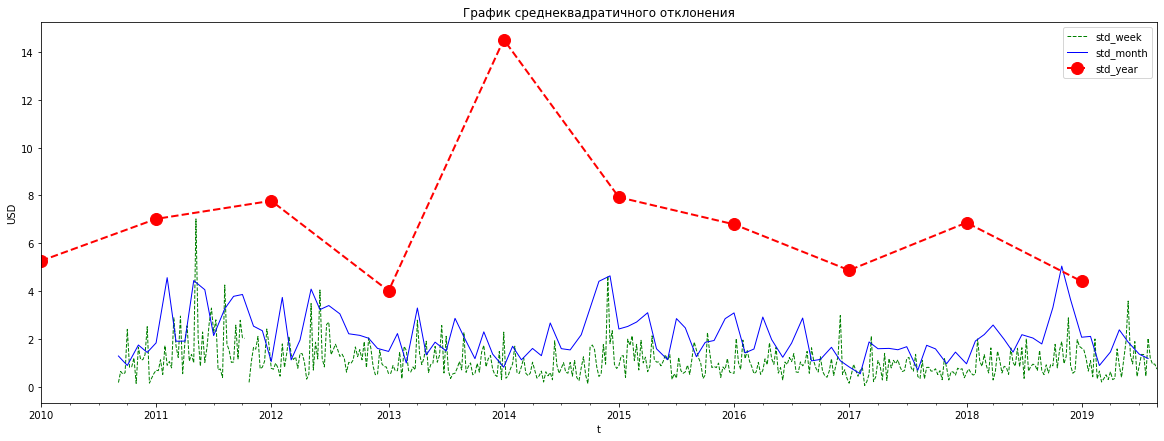

In [27]:
brent_data_year = brent_data.resample('Y').std()
brent_data_month = brent_data.resample('M').std()
brent_data_week = brent_data.resample('W').std()

plt.figure(figsize=(20,7))
brent_data_week['Значение'].plot(color='g', linewidth=1, linestyle='dashed', label='std_week')
brent_data_month['Значение'].plot(color='b', linewidth=1, label='std_month')
brent_data_year['Значение'].plot(color='r', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='std_year')
plt.legend()
plt.ylabel('USD')
plt.xlabel('t')
plt.title('График среднеквадратичного отклонения')

__5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.__

При увеличении периода измерений уменьшается частота и амплитуда колебаний, а std растёт по амплитуде с увеличением периода наблюдений.